# Predicting Closing Stock Price using Long Short Term Memory (LSTM) artificial recurrent neural network
* uses part $n$ day stock price
## What the sh*t is LSTM?
  * an artificial neural network
    * WTS is a nerual network?
      * It's like an artificial 'brain'
  * stores past information that is important and forgets information that is not
  * has feedback connections (unlike standard feedforward neural nets)

In [2]:
# Imports
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
# Load Data
prices = np.loadtxt('prices.txt')
df = pd.DataFrame(prices)
df


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.80,4.13,28.54,17.95,47.41,56.23,52.21,13.96,41.87,49.42,...,48.26,37.11,53.10,26.29,26.27,61.66,50.22,9.81,33.94,38.33
246,43.87,4.13,28.56,17.96,47.11,56.81,52.22,13.81,41.94,49.35,...,48.21,37.14,53.08,26.24,25.97,61.67,50.26,9.81,34.06,38.35
247,43.66,4.14,28.59,18.05,47.13,57.05,52.28,13.84,41.73,49.24,...,48.62,37.14,53.11,26.07,25.74,61.67,50.29,9.82,33.86,38.07
248,43.61,4.14,28.64,18.06,46.72,56.97,52.39,13.86,41.70,49.28,...,48.32,37.17,53.16,26.00,25.96,61.69,50.32,9.81,34.06,39.07


In [4]:
# The first stock
df[0]

0      40.44
1      40.58
2      40.52
3      40.47
4      40.23
       ...  
245    43.80
246    43.87
247    43.66
248    43.61
249    43.52
Name: 0, Length: 250, dtype: float64

In [5]:
# Graph of all stonks XD
# fig, axes = plt.subplots(figsize=(25, 20), dpi=300)
# for i in range(df.shape[1]):
#     plt.plot(df[i])

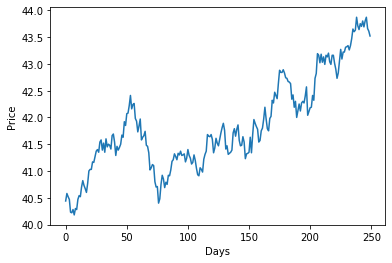

In [6]:
# Graph of first stonk
plt.plot(df[0])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Scaling

[[0.93975904]
 [0.91566265]
 [0.93975904]
 [0.96385542]
 [0.95180723]
 [1.        ]
 [1.        ]
 [0.96385542]
 [0.96385542]
 [0.95180723]
 [0.95180723]
 [0.96385542]
 [0.96385542]
 [0.96385542]
 [0.93975904]
 [0.91566265]
 [0.87951807]
 [0.85542169]
 [0.87951807]
 [0.8313253 ]
 [0.85542169]
 [0.8313253 ]
 [0.81927711]
 [0.84337349]
 [0.81927711]
 [0.79518072]
 [0.79518072]
 [0.74698795]
 [0.78313253]
 [0.79518072]
 [0.77108434]
 [0.74698795]
 [0.75903614]
 [0.77108434]
 [0.80722892]
 [0.79518072]
 [0.78313253]
 [0.78313253]
 [0.77108434]
 [0.78313253]
 [0.78313253]
 [0.81927711]
 [0.86746988]
 [0.87951807]
 [0.87951807]
 [0.85542169]
 [0.84337349]
 [0.81927711]
 [0.80722892]
 [0.77108434]
 [0.75903614]
 [0.73493976]
 [0.74698795]
 [0.73493976]
 [0.71084337]
 [0.69879518]
 [0.69879518]
 [0.68674699]
 [0.6746988 ]
 [0.68674699]
 [0.69879518]
 [0.72289157]
 [0.69879518]
 [0.72289157]
 [0.74698795]
 [0.78313253]
 [0.78313253]
 [0.81927711]
 [0.81927711]
 [0.77108434]
 [0.77108434]
 [0.68

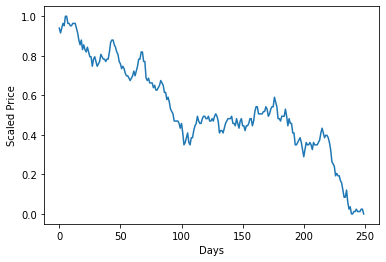

In [7]:
# Convert Dataset to Numpy array
stonks = [1]
data = (df.filter(items=stonks)).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(data)

print(scaled_df)
plt.plot(scaled_df)
plt.xlabel('Days')
plt.ylabel('Scaled Price')
plt.show()

# Train-Test Split
* 80% training and 20% testing

In [8]:
# df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=101)

In [9]:
# Train-Test Split
training_data_len = math.ceil(len(scaled_df) * 0.8)
train_data = scaled_df[0:training_data_len, :]
test_data = scaled_df[training_data_len-60:, :]

## Getting x_train and y_train for model
* 

In [10]:
# Split data to x_train and y_train data sets
days = 60
x_train = []
y_train = []

for i in range(days, len(train_data)):
    x_train.append(train_data[i-days : i, 0])
    y_train.append(train_data[i, 0])

print(f'x_train length: {len(x_train)}, y_train length: {len(y_train)}')

x_train length: 140, y_train length: 140


In [11]:
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data to be 3D instead of 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))   
#                   2nd tuple ^: (#samples/#rows, #timesteps, #features)
x_train.shape

(140, 60, 1)

# Building the Model
## Model Architechture:
* Layer 1: LSTM Layer with return sequences (because we are feeding into another LSTM Layer, layer 2)
* Layer 2: LSTM Layer without return sequences
* Layer 3: Dense neural network layer with 25 neurons
* Layer 4: Dense neural network layer with 1 neuron

In [13]:
# Build the LSTM Model
model = Sequential()

# First LSTM Layer with 50 neurons with return sequences
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Second LSTM Layer with 50 neurons without return sequences
model.add(LSTM(50, return_sequences=False))

# Third Dense Layer with 25 neurons
model.add(Dense(25))

# Fourth Dense Layer with 1 neuron
model.add(Dense(1))

* Optimizer improves loss function
* Loss function used to evaluate model performance in training

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

TODO what is:
* batch_size
* epochs

In [15]:
# Trian the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

140/140 [==============================] - 9s 23ms/step - loss: 0.0158


# Testing the Model

In [16]:
# Split data to x_test and y_test data sets
x_test = []
y_test = []
for i in range(days, len(test_data)):
    x_test.append(test_data[i-days:i, 0])
    y_test.append(test_data[i, 0])

In [17]:
# Convert to np arrays
x_test = np.array(x_test)

In [18]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

* we want predictions to be the same as x_test

In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 29ms/step


# Model Evaluation

## Root Mean Squared Error
* between 0.2 and 0.5 shows that the model can relatively predict the data accurately

In [20]:
# Root Mean Square Error (RMSE)
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

4.18654043658604

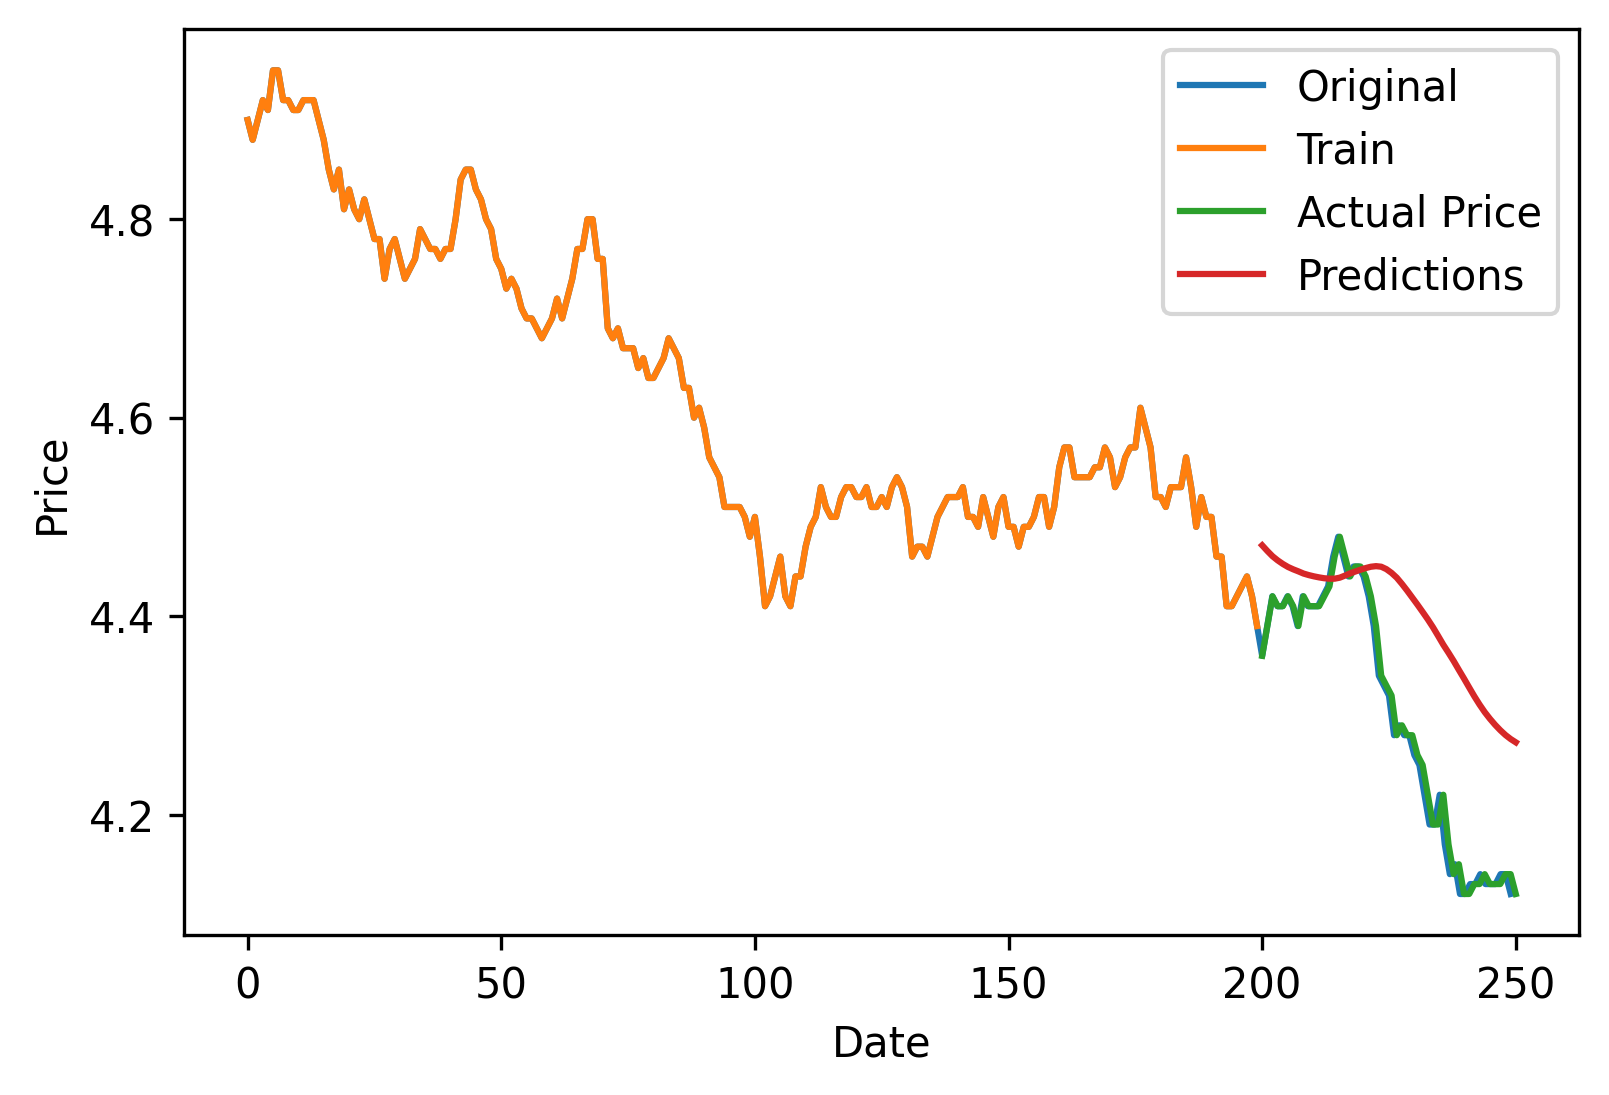

In [21]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]

plt.figure(dpi=300)
plt.plot(df[1])
plt.plot(train)
plt.plot(np.linspace(training_data_len, len(data)), valid)
plt.plot(np.linspace(training_data_len, len(data)), predictions)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Original', 'Train', 'Actual Price', 'Predictions'])
plt.show()

TODO
- create helper functions for splitting and reshaping